**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import modplot
import os

**Get the Files**

In [5]:
# useful directories
base_dir= 'C:\\Users\\vega0\\Documents\\Academics\\MIT Course Materials\\Course 8 Physics\\8.13 Experimental Physics 1\\Fall 2021\\Experiment Sequences\\21cm Radio Astrophysics\\'

dir_data1 = base_dir + '\\Data\\10-26-2021'
dir_data2 = base_dir + '\\Data\\10-28-2021'
dir_plot = base_dir + '\\Paper and Presentation'

Get the Azimuth, Elevation, and Grid Scans

In [9]:
os.chdir(dir_data1)

az_scans = [path for path in os.listdir()[:3]]
el_scans = [path for path in os.listdir()[3:6]]
grid_scans = [path for path in os.listdir()[6:]]

Get the Galaxy Scans

In [10]:
os.chdir(dir_data2)

gal_scans = [os.listdir()[0]]

**Extract Numerical Data from all of the Files**

Azimuth Scan Data

In [27]:
def az_reader(paths):
    azimuths = []
    spectra = []
    for path in paths:
        f = open(path, 'r')
        file= f.readlines()
        data = file[5:][::2]
        
        # list to store numerical averages of scan
        azs = []
        avgs = []
        
        for line in data:
            vals = line.split()
            az = float(vals[1])
            freqs = vals[vals.index('64') + 1:vals.index('vlsr')]
            nums = [float(freq) for freq in freqs]
            azs.append(az)
            avgs.append(np.average(nums))
        azimuths.append(azs)
        spectra.append(avgs)
    return azimuths, spectra

In [31]:
os.chdir(dir_data1)
azimuths, az_spectra = az_reader(az_scans)

Elevation Scan Data

In [65]:
os.chdir(dir_data1)

['az_scan_1.rad',
 'az_scan_2.rad',
 'az_scan_3.rad',
 'el_scan_1.rad',
 'el_scan_2.rad',
 'el_scan_3.rad',
 'grid_scan_1.rad',
 'grid_scan_2.rad']

In [81]:
# scan 1
fel1 = open('el_scan_1.rad', 'r')

lines_el1 = fel1.readlines()

elevations_1 = []
spectra_1 = []

for line in lines_el1[5:67][::2]:
    vals = line.split()
    el = float(vals[2])
    freqs = vals[vals.index('64') + 1:vals.index('vlsr')]
    nums = [float(freq) for freq in freqs]
    elevations_1.append(el)
    spectra_1.append(np.average(nums))

In [82]:
# scan 2
fel2 = open('el_scan_2.rad', 'r')

lines_el2 = fel2.readlines()

elevations_2 = []
spectra_2 = []

for line in lines_el2[16:][::2]:
    vals = line.split()
    el = float(vals[2])
    freqs = vals[vals.index('64') + 1:vals.index('vlsr')]
    nums = [float(freq) for freq in freqs]
    elevations_2.append(el)
    spectra_2.append(np.average(nums))

In [83]:
# scan 3
fel3 = open('el_scan_3.rad', 'r')

lines_el3 = fel3.readlines()

elevations_3 = []
spectra_3 = []

for line in lines_el3[5:][::2]:
    vals = line.split()
    el = float(vals[2])
    freqs = vals[vals.index('64') + 1:vals.index('vlsr')]
    nums = [float(freq) for freq in freqs]
    elevations_3.append(el)
    spectra_3.append(np.average(nums))

Grid Scan Data

In [99]:
os.chdir(dir_data1)

In [103]:
# run 1
f1 = open('grid_scan_1.rad', 'r')

lines1 = f1.readlines()

gelevations_1 = []
gazimuths_1 = []
gspectra_1 = []

for line in lines1[5:][::2]:
    vals = line.split()
    az = float(vals[1])
    el = float(vals[2])
    freqs = vals[vals.index('64') + 1:vals.index('vlsr')]
    nums = [float(freq) for freq in freqs]
    gazimuths_1.append(az)
    gelevations_1.append(el)
    gspectra_1.append(np.average(nums))

In [109]:
# run 2
f2 = open('grid_scan_2.rad', 'r')

lines2 = f2.readlines()

gelevations_2 = []
gazimuths_2 = []
gspectra_2 = []

good_lines = lines2[5:57][::2] + lines2[62:][::2]

for line in good_lines:
    vals = line.split()
    az = float(vals[1])
    el = float(vals[2])
    freqs = vals[vals.index('64') + 1:vals.index('vlsr')]
    nums = [float(freq) for freq in freqs]
    gazimuths_2.append(az)
    gelevations_2.append(el)
    gspectra_2.append(np.average(nums))

**Make Plots of the Data**

In [42]:
# plottig parameters
save = False
mpl.rcParams['figure.dpi'] = 300
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif')

Plot the Azimuth Spectra

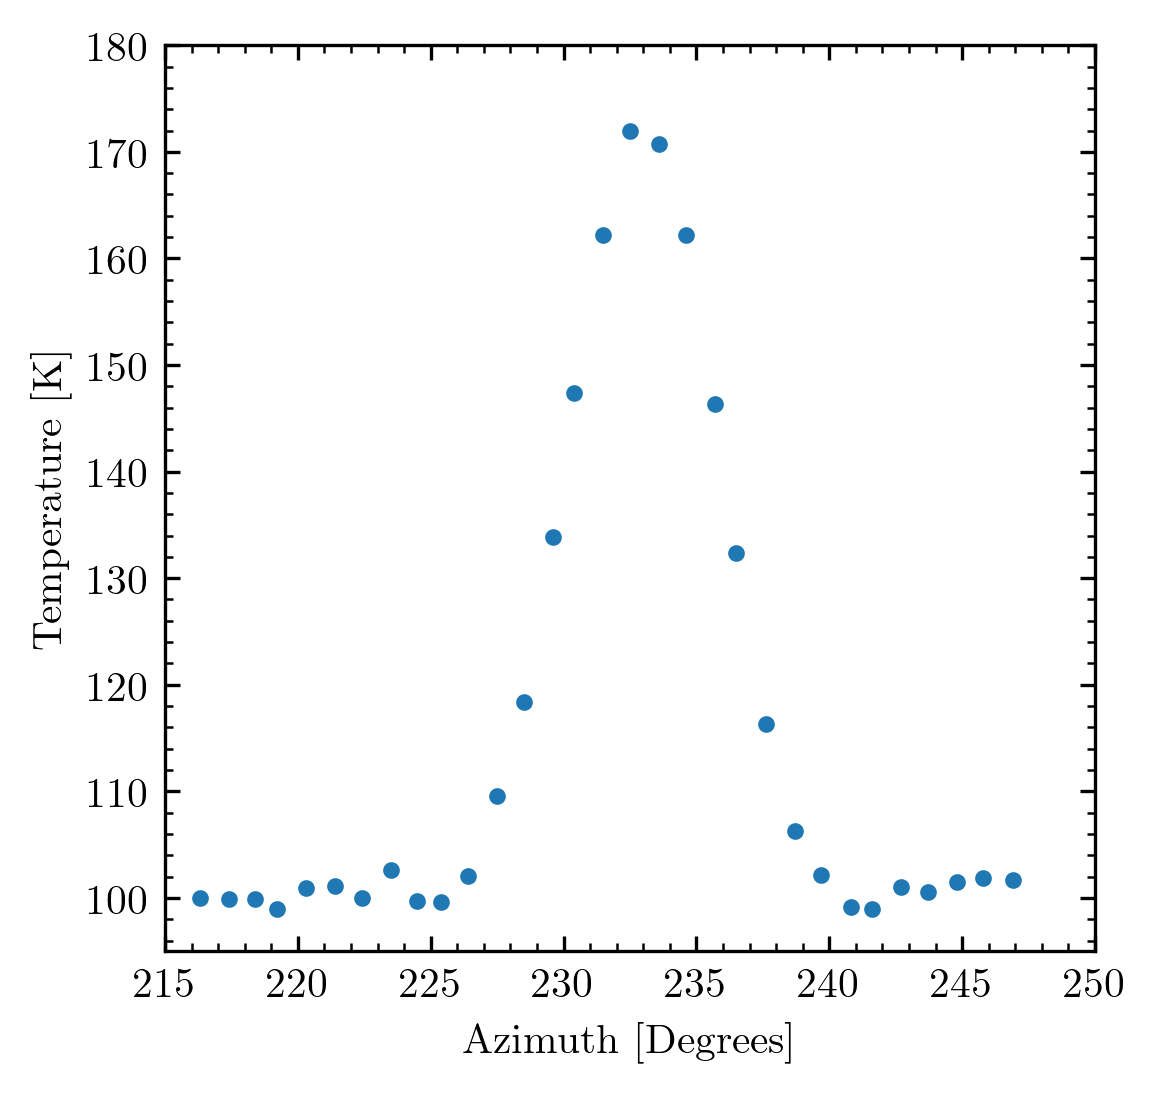

In [54]:
# run 1
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(215,250), ylim=(95,180), 
                         xlabel='Azimuth [Degrees]', ylabel='Temperature [K]')

ax.plot(azimuths[0][1:], az_spectra[0][1:], marker='.', ls='none')

save = False
if save:
    fig.save(dir_plot + '//az_scan_1_day1.png')

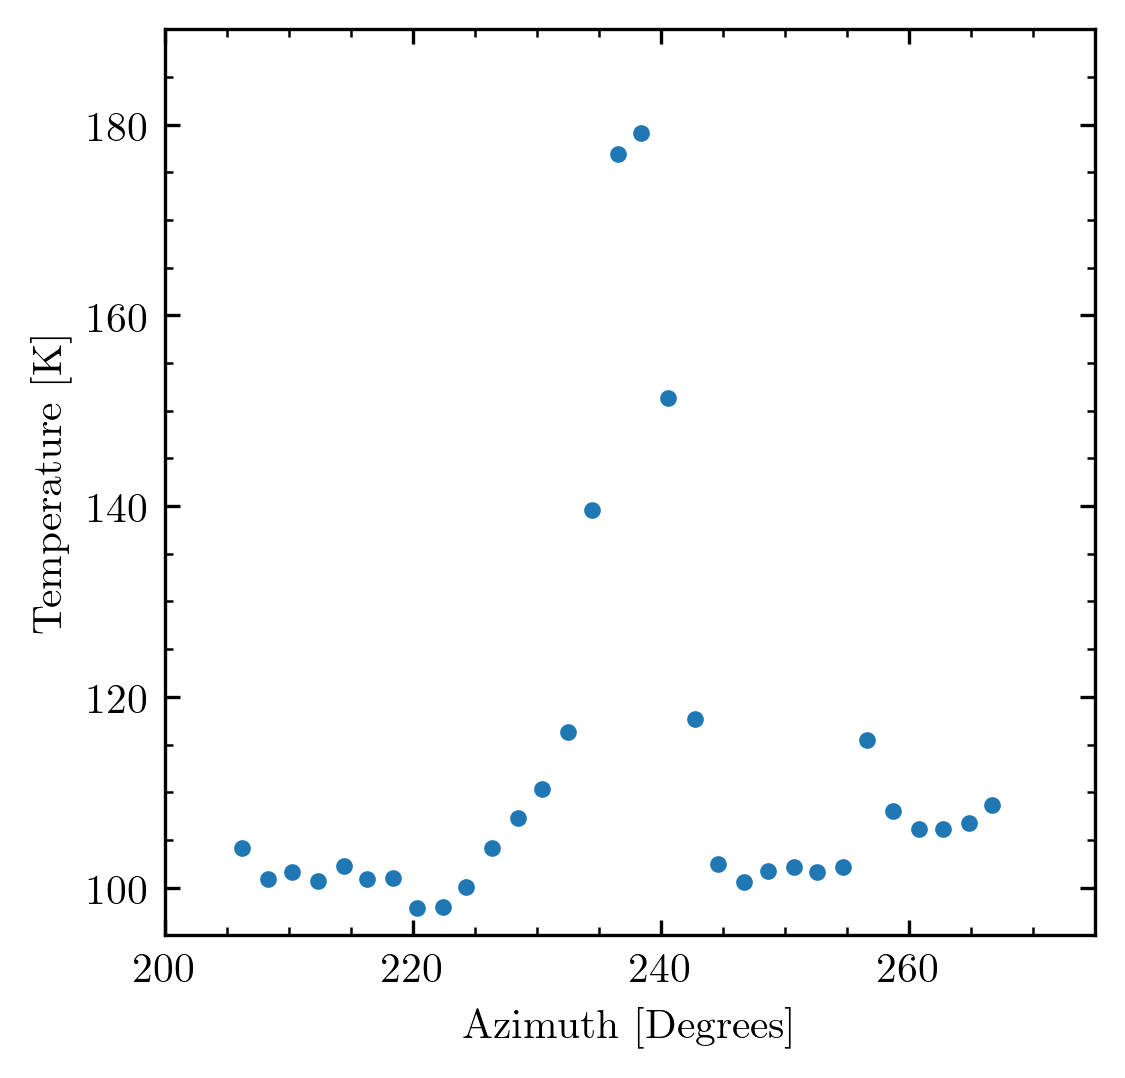

In [59]:
# run 2
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(200,275), ylim=(95,190), 
                         xlabel='Azimuth [Degrees]', ylabel='Temperature [K]')

ax.plot(azimuths[1][1:], az_spectra[1][1:], marker='.', ls='none')

save = False
if save:
    fig.save(dir_plot + '//az_scan_2_day1.png')

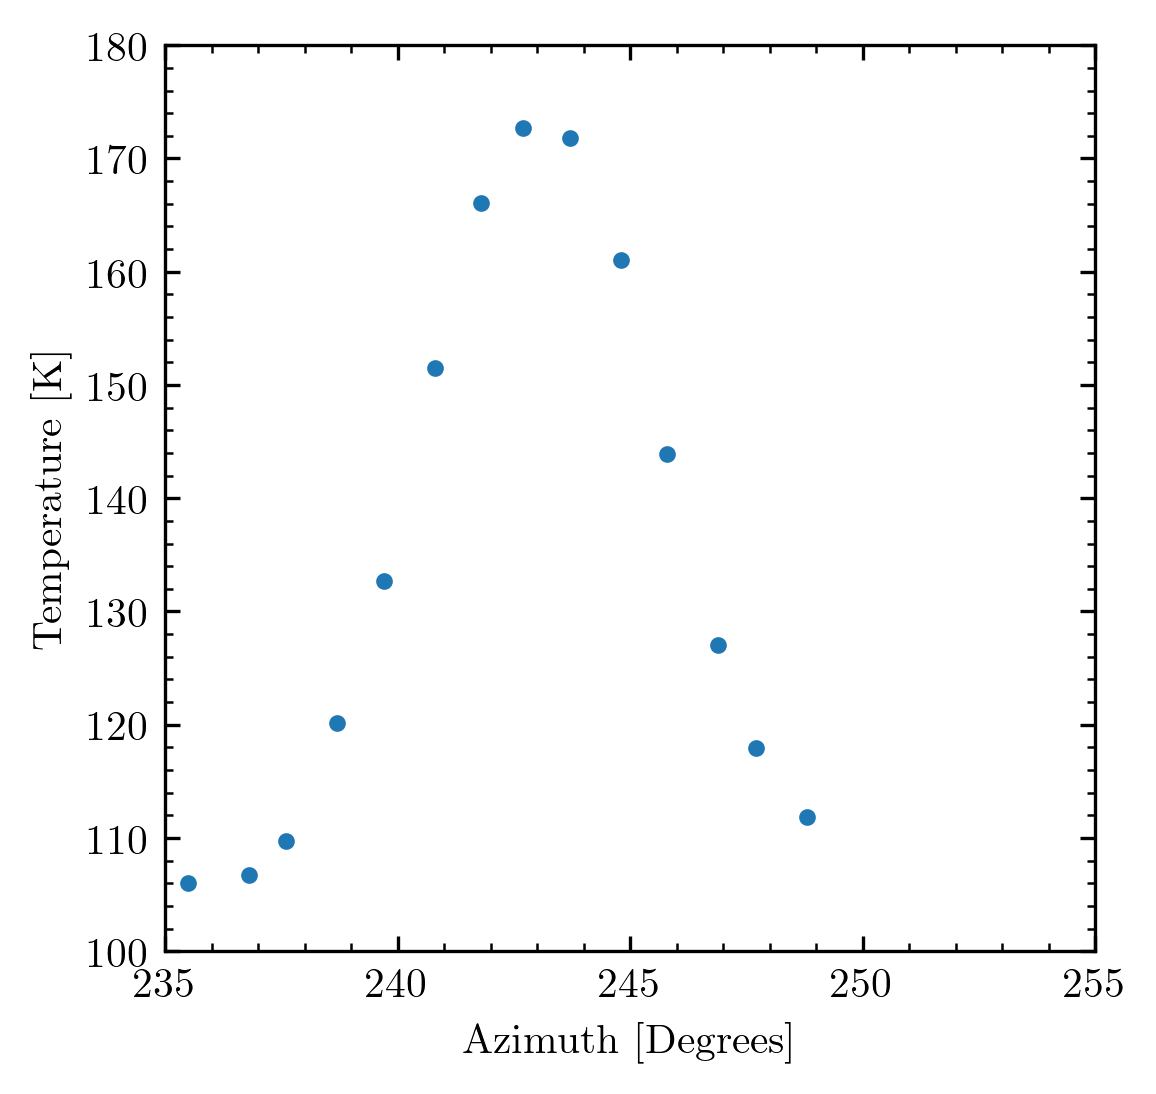

In [63]:
# run 3
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(235,255), ylim=(100,180), 
                         xlabel='Azimuth [Degrees]', ylabel='Temperature [K]')

ax.plot(azimuths[2][1:], az_spectra[2][1:], marker='.', ls='none')

save = False
if save:
    fig.save(dir_plot + '//az_scan_3_day1.png')

Plot the Elevation Spectra

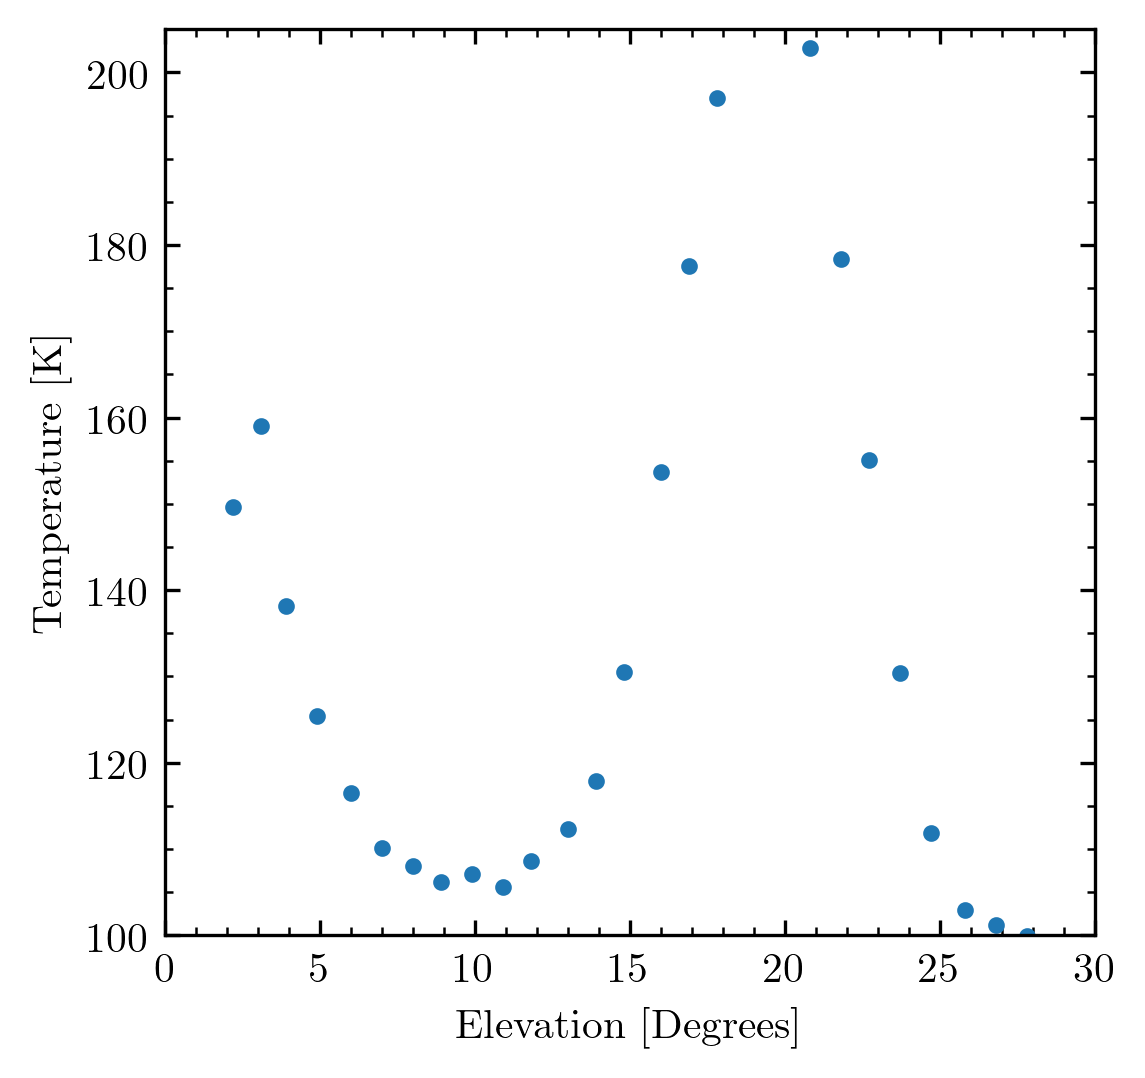

In [89]:
# run 1
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,30), ylim=(100,205), 
                         xlabel='Elevation [Degrees]', ylabel='Temperature [K]')

ax.plot(elevations_1[1:], spectra_1[1:], marker='.', ls='none')

save = False
if save:
    fig.save(dir_plot + '//el_scan_1_day1.png')

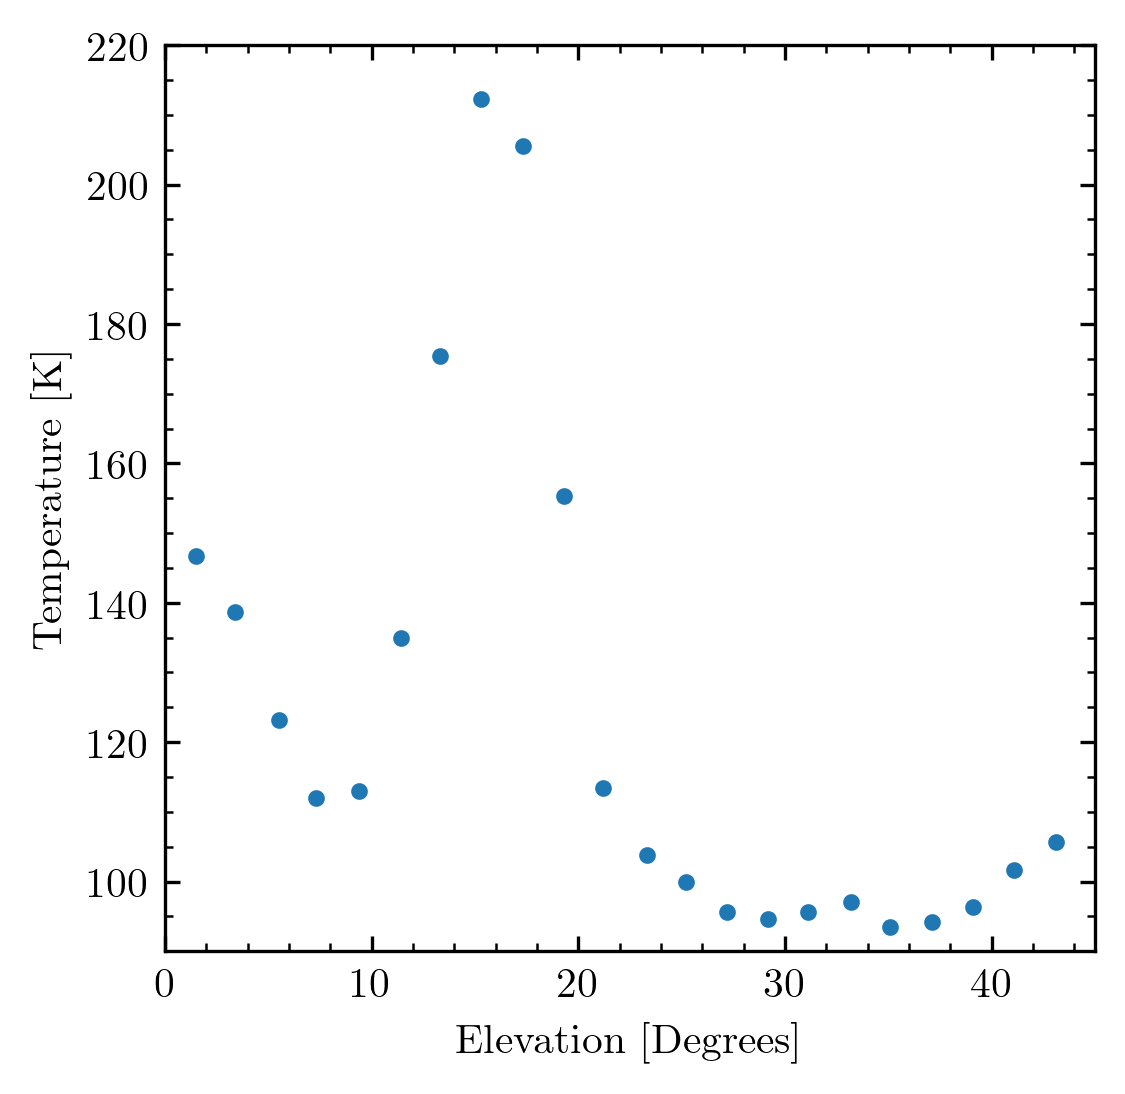

In [96]:
# run 2
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,45), ylim=(90,220), 
                         xlabel='Elevation [Degrees]', ylabel='Temperature [K]')

ax.plot(elevations_2[1:], spectra_2[1:], marker='.', ls='none')

save = False
if save:
    fig.save(dir_plot + '//el_scan_2_day1.png')

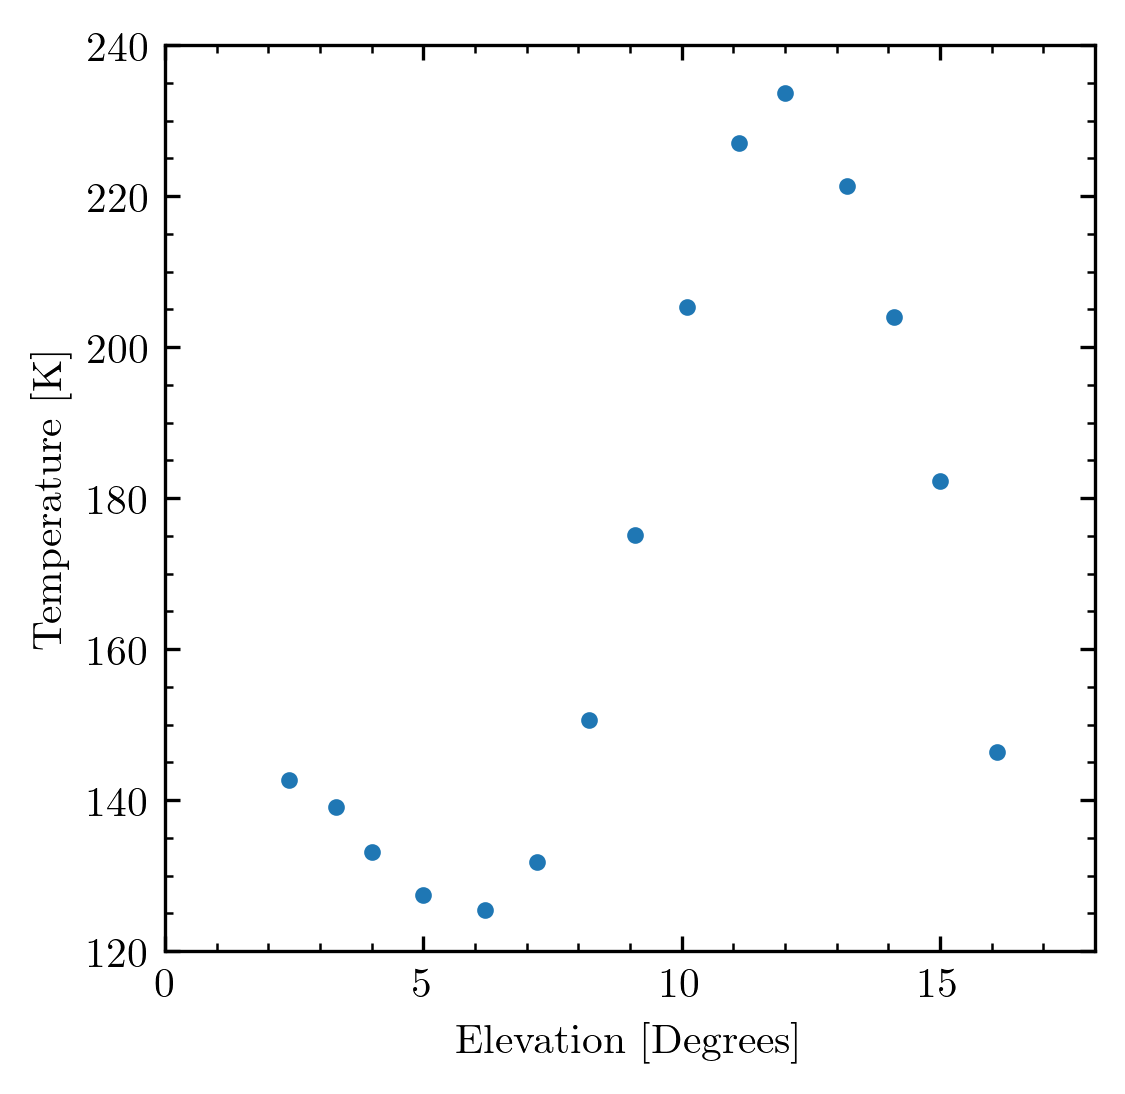

In [98]:
# run 3
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,18), ylim=(120,240), 
                         xlabel='Elevation [Degrees]', ylabel='Temperature [K]')

ax.plot(elevations_3[1:], spectra_3[1:], marker='.', ls='none')

save = False
if save:
    fig.save(dir_plot + '//el_scan_3_day1.png')

**Ignore Below**

Plot the Grid Scans

In [113]:
# tool for 3d plots
from mpl_toolkits import mplot3d

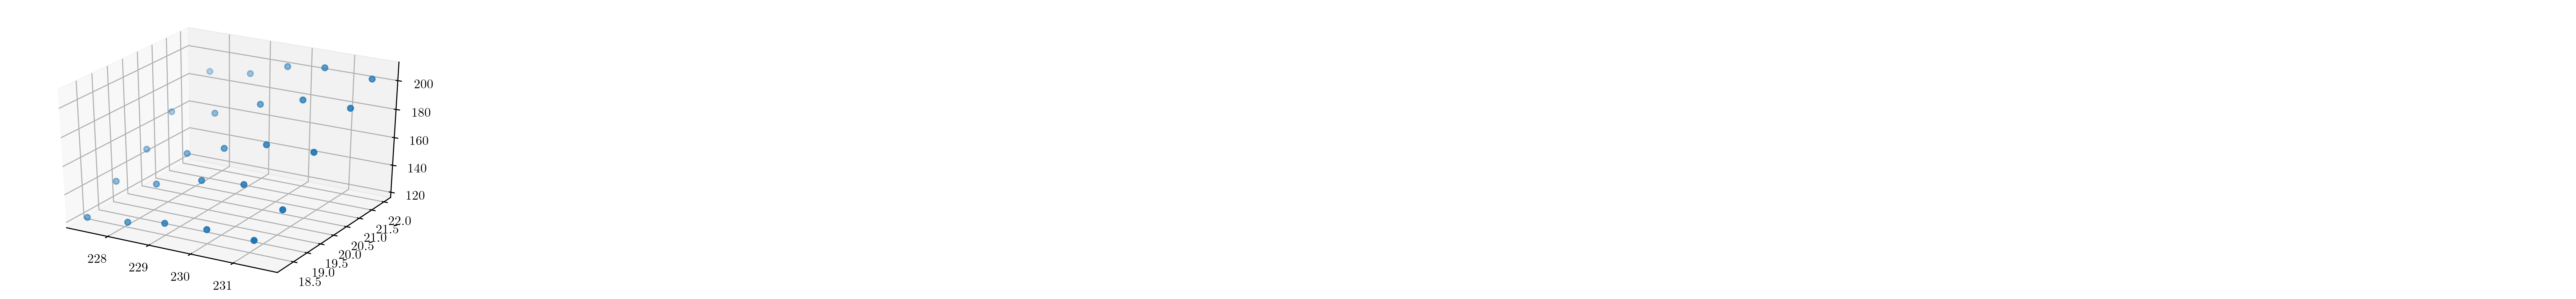

In [129]:
# run 1
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
##ax.plot3D(gazimuths_1, gelevations_1, gspectra_1, 'gray')


ax.scatter3D(gazimuths_1[1:], gelevations_1[1:], gspectra_1[1:], 'blue')

Text(0.5, 0, 'Temperature [K]')

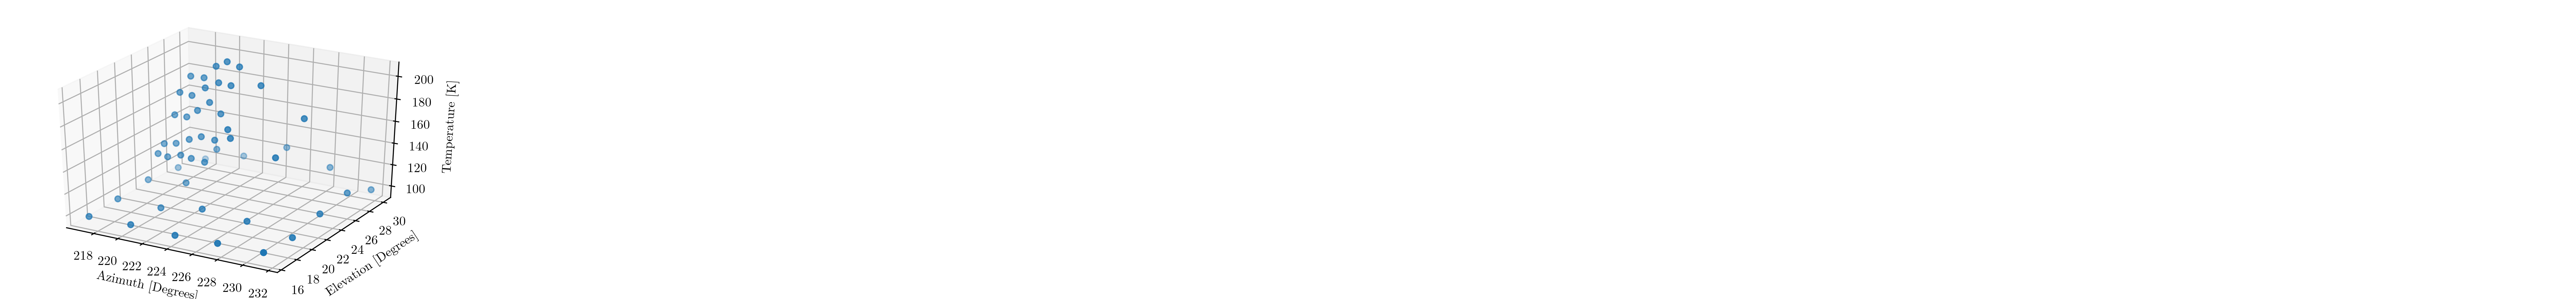

In [127]:
# run 2
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
##ax.plot3D(gazimuths_1, gelevations_1, gspectra_1, 'gray')


ax.scatter3D(gazimuths_2[1:], gelevations_2[1:], gspectra_2[1:], 'orange')
ax.set_xlabel('Azimuth [Degrees]')
ax.set_ylabel('Elevation [Degrees]')
ax.set_zlabel('Temperature [K]')

##ax.contour3D(gazimuths_2[1:], gelevations_2[1:], gspectra_2[1:], cmap='binary')